In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_excel (r'BASE DE DATOS TESIS ACNE_def.xlsx')

In [4]:
df

,Número,Registro,Apellido1,Apellido2,Nombre,Residencia,Fototipo,Fecha Nac,Edad,Edad meses,...,Grav Elastosis,Grav hiper,Grav queloi,Post tto,grav ice pick.1,Grav Roll on.1,Grav Box car.1,Grav Elastosis.1,Grav hiper.1,Grav queloi.1
0,1,794818,García,del Motte,Melissa,0,IV,NaN,18,NaN,...,0,1,0,NaN,3,2,1,0,0,0
1,2,860605,Valencia,NaN,Alejandro,0,IV,NaN,15,NaN,...,1,1,0,NaN,2,1,3,1,1,0
2,3,859534,Hernandez,Buendia,Maria Fernanda,0,IV,NaN,13,NaN,...,0,0,0,NaN,2,1,1,0,0,0
3,4,854585,Arenas,Dominguez,Andres,0,III,NaN,17,NaN,...,1,0,0,NaN,2,2,2,0,0,0
4,5,801512,Islas,Mora,Maria Fernanda,1,V,NaN,17,NaN,...,0,0,0,NaN,2,1,1,0,0,0
5,6,819207,Marín,Saavedra,Adolfo Daniel,0,V,NaN,16,NaN,...,0,0,0,NaN,3,1,1,0,0,0
6,7,839619,Hernandez,Hernandez,Nallely,0,IV,NaN,17,NaN,...,0,0,0,NaN,1,1,0,1,0,0
7,8,769921,Oloarte,Garcia,Angel,0,IV,NaN,15,NaN,...,1,1,0,NaN,2,2,1,0,1,0
8,9,806358,Quinto,Gonzalez,Aldo sebastian,0,IV,NaN,14,NaN,...,0,0,0,NaN,2,2,1,0,0,0


In [5]:
df.keys()

Index(['Número', 'Registro ', 'Apellido1', 'Apellido2', 'Nombre', 'Residencia',
       'Fototipo', 'Fecha Nac', 'Edad ', 'Edad meses', 'Sexo',
       'Sesiones Previas', 'Antecedente familiar', 'Antc personal',
       'Antc herpes oral', 'Retinoide sistem', 'Retinoide Topi',
       'SCARS inicial', 'SCARS fin', 'ECCA inicial', 'ECCA final', 'UDE basal',
       'UDE final', 'DERMIS basal', 'DERMIS final', 'FASQOL Inc 1',
       'FASQOL Inc 2', 'FASQOL Inc 3', 'FASQOL Inc 4', 'FASQOL Inc 5',
       'FASQOL Inc 6', 'FASQOL Inc 7', 'FASQOL Inc 8', 'FASQOL Inc 9',
       'FASQOL Inc 10', 'FASQOL Inc Average', 'FASQOL Fin 1', 'FASQOL Fin 2',
       'FASQOL Fin 3', 'FASQOL Fin 4', 'FASQOL Fin 5', 'FASQOL Fin 6',
       'FASQOL Fin 7', 'FASQOL Fin 8', 'FASQOL Fin 9', 'FASQOL Fin 10',
       'FASQOL fin Average', 'Unnamed: 47', 'AF1', 'AF2', 'AF3', 'AF4', 'AF5',
       'AF6', 'AF7', 'AF8', 'AF9', 'AF10', 'Icepick', 'Rollon', 'Boxcar',
       'Elastosis', 'Hipertrofica', 'Queloide', 'grav ice pi

In [26]:
db = { ii: np.array(df[ii]) for ii in df.keys()}

In [30]:
delta_UDE = db['UDE final']-db['UDE basal']

In [31]:
delta_DERMIS = db['DERMIS final']-db['DERMIS basal']

In [100]:
delta_UDE_DERMIS = (delta_UDE + delta_DERMIS)

In [32]:
delta_SCARS = db['SCARS fin']-db['SCARS inicial']

In [33]:
delta_ECCA = db['ECCA final']-db['ECCA inicial']

In [34]:
delta_FASQOL = db['FASQOL fin Average']-db['FASQOL Inc Average']

In [123]:
delta_UDE

array([-20.8,  -8.6,  -9.9, -43.1,  -5.2, -41.7,   0. ,  -3.9,   5.2])

In [124]:
delta_DERMIS

array([ -5.2 , -23.4 , -20.1 , -84.5 , -25.96, -46.8 , -41.6 , -19.6 ,
         0.  ])

# UDE

In [46]:
slope, intercept, r_value, p_value, std_err = stats.linregress(db['UDE basal'],-delta_UDE)

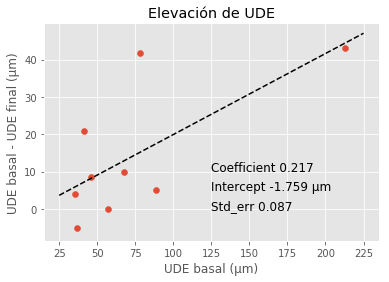

In [69]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(db['UDE basal'].reshape(-1, 1), -delta_UDE.reshape(-1, 1))  # perform linear regression
X_pred = np.array([25,225])
Y_pred = linear_regressor.predict(X_pred.reshape(-1,1))  # make predictions

plt.plot(X_pred, Y_pred, 'k--')
plt.scatter(df['UDE basal'],-delta_UDE)
plt.title("Elevación de UDE")
plt.xlabel("UDE basal (μm)")
plt.ylabel("UDE basal - UDE final (μm)")
plt.text(125, 10, r'Coefficient %1.3f'%(slope), fontsize=12)
plt.text(125, 5, r'Intercept %1.3f μm'%(intercept), fontsize=12)
plt.text(125, 0, r'Std_err %1.3f'%(std_err), fontsize=12)
#plt.show()


plt.savefig('UDE.png', dpi=300)

# DERMIS

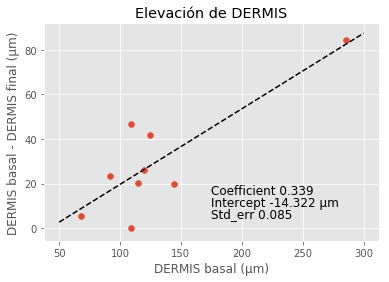

In [75]:
slope, intercept, r_value, p_value, std_err = stats.linregress(db['DERMIS basal'],-delta_DERMIS)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(db['DERMIS basal'].reshape(-1, 1), -delta_DERMIS.reshape(-1, 1))  # perform linear regression
X_pred = np.array([50,300])
Y_pred = linear_regressor.predict(X_pred.reshape(-1,1))  # make predictions

plt.plot(X_pred, Y_pred, 'k--')
plt.scatter(df['DERMIS basal'],-delta_DERMIS)
plt.title("Elevación de DERMIS")
plt.xlabel("DERMIS basal (μm)")
plt.ylabel("DERMIS basal - DERMIS final (μm)")

plt.text(175, 15, r'Coefficient %1.3f'%(slope), fontsize=12)
plt.text(175, 10, r'Intercept %1.3f μm'%(intercept), fontsize=12)
plt.text(175, 5, r'Std_err %1.3f'%(std_err), fontsize=12)
#plt.show()

plt.savefig('DERMIS.png', dpi=300)

# UDE frente a DERMIS

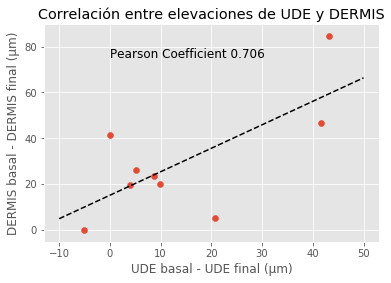

In [118]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(-delta_UDE.reshape(-1, 1), -delta_DERMIS.reshape(-1, 1))  # perform linear regression

X_pred = np.array([-10,50])
Y_pred = linear_regressor.predict(X_pred.reshape(-1, 1))  # make predictions


plt.plot(X_pred, Y_pred, 'k--')
plt.scatter(-delta_UDE,-delta_DERMIS)
plt.title("Correlación entre elevaciones de UDE y DERMIS")
plt.xlabel("UDE basal - UDE final (μm)")
plt.ylabel("DERMIS basal - DERMIS final (μm)")
pp = stats.pearsonr(-delta_UDE,-delta_DERMIS)

plt.text(0, 75, r'Pearson Coefficient %1.3f'% pp[0], fontsize=12)
#plt.show()

plt.savefig('correlation_UDE_DERMIS.png', dpi=300)

# SCARS vs ECCA

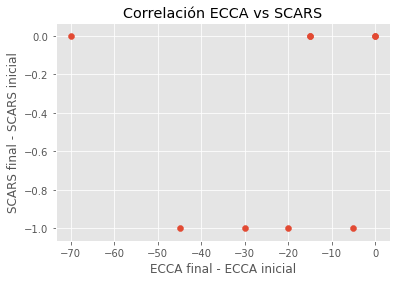

In [119]:
plt.scatter(delta_ECCA,delta_SCARS)
plt.title("Correlación ECCA vs SCARS")
plt.xlabel("ECCA final - ECCA inicial")
plt.ylabel("SCARS final - SCARS inicial")

plt.savefig('correlation_ECCA_SCARS.png', dpi=300)

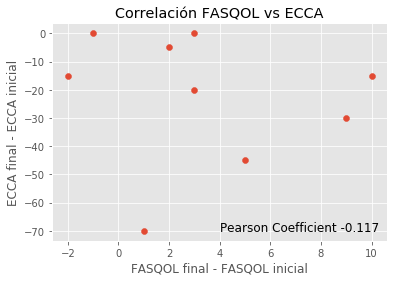

In [125]:
plt.scatter(delta_FASQOL,delta_ECCA)
plt.title("Correlación FASQOL vs ECCA")
plt.ylabel("ECCA final - ECCA inicial")
plt.xlabel("FASQOL final - FASQOL inicial")

pp = stats.pearsonr(delta_FASQOL,delta_ECCA)

plt.text(4, -70, r'Pearson Coefficient %1.3f'% pp[0], fontsize=12)
#plt.show()

plt.savefig('correlation_FASQOL_ECCA.png', dpi=300)

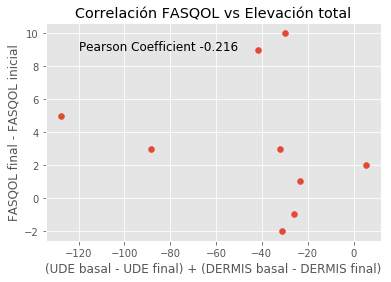

In [126]:
plt.scatter(delta_UDE_DERMIS, delta_FASQOL)
plt.title("Correlación FASQOL vs Elevación total")
plt.ylabel("FASQOL final - FASQOL inicial")
plt.xlabel("(UDE basal - UDE final) + (DERMIS basal - DERMIS final)")

pp = stats.pearsonr(delta_UDE_DERMIS, delta_FASQOL)

plt.text(-120, 9, r'Pearson Coefficient %1.3f'% pp[0], fontsize=12)
#plt.show()

plt.savefig('correlation_RellenoTotalColágeno_FASQOL.png', dpi=300)

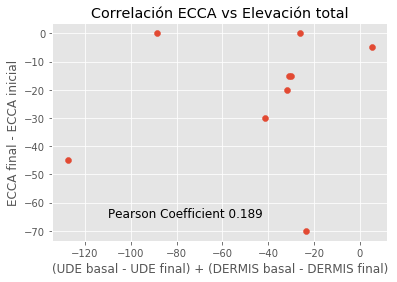

In [127]:
plt.scatter(delta_UDE_DERMIS, delta_ECCA)
plt.title("Correlación ECCA vs Elevación total")
plt.ylabel("ECCA final - ECCA inicial")
plt.xlabel("(UDE basal - UDE final) + (DERMIS basal - DERMIS final)")

pp = stats.pearsonr(delta_UDE_DERMIS, delta_ECCA)

plt.text(-110, -65, r'Pearson Coefficient %1.3f'% pp[0], fontsize=12)
#plt.show()

plt.savefig('correlation_RellenoTotalColágeno_ECCA.png', dpi=300)